## Work done by Karthik Raj (SSID: 3035366972)

In [1]:
import pandas as pd
import gzip
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [2]:
# Loading in the reviews of products
df_rev = getDF('Video_Games_5.json.gz')

In [3]:
display(df_rev.shape)
display(df_rev.dtypes)
df_rev.head()

(497577, 12)

overall           float64
verified             bool
reviewTime         object
reviewerID         object
asin               object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
vote               object
style              object
image              object
dtype: object

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


# Processing Reviews DataFrame

## Conversion of Votes to INT Data Type

In [4]:
df_rev['vote'] = df_rev['vote'].str.replace(',', '')
df_rev['vote'].fillna(0, inplace = True)
df_rev['vote'] = df_rev['vote'].astype(int)

In [5]:
# Find the range of votes
df_rev['vote'].describe()

count    497577.000000
mean          2.308280
std          17.133128
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2474.000000
Name: vote, dtype: float64

In [6]:
display(df_rev.dtypes)

overall           float64
verified             bool
reviewTime         object
reviewerID         object
asin               object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
vote                int64
style              object
image              object
dtype: object

## Filter unverified

In [7]:
df_verif = df_rev[df_rev['verified'] == True]
display(df_verif.shape)
df_verif.head()

(332645, 12)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,0,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,0,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,0,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,0,NaN,NaN
5,4.0,True,"11 13, 2014",A11V6ZJ2FVQY1D,0700026657,IBRAHIM ALBADI,i liked a lot some time that i haven't play a ...,Anno 2070,1415836800,0,NaN,NaN


## Checking to see if worthwhile creating average rating from solely reviews with nonzero Helpfulness Votes

In [8]:
df_verif['vote'].describe()

count    332645.000000
mean          0.902725
std           9.051633
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1214.000000
Name: vote, dtype: float64

In [9]:
df_nonz_helpf = df_verif[df_verif['vote'] > 0]
df_nonz_helpf['vote'].describe()

count    37619.000000
mean         7.982323
std         25.845426
min          2.000000
25%          2.000000
50%          3.000000
75%          6.000000
max       1214.000000
Name: vote, dtype: float64

<AxesSubplot:xlabel='vote', ylabel='Density'>

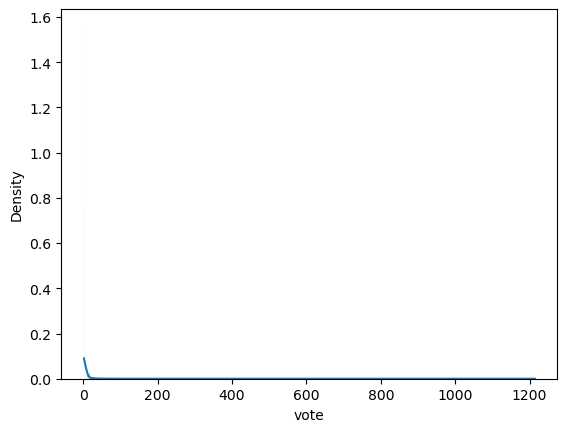

In [10]:
sns.histplot(df_nonz_helpf['vote'], stat = 'density', kde = True)

In [11]:
# Losing 89% of the data if just rolling with nonzero helpfulness reviews so not worth
(display('Proportion of Reviews with Nonzero Helpfulness ' +
        str(df_nonz_helpf.shape[0] / df_verif.shape[0])))

'Proportion of Reviews with Nonzero Helpfulness 0.1130905319484736'

## Creating Average Rating Column for Each Product Regardless of Helpfulness

In [12]:
# Losing 7K of products if average is computed solely from helpful reviews
z_helpf_avg = df_verif.groupby('asin').agg({'overall' : np.mean})
z_helpf_avg.rename(columns = {'overall' :'avg_rating_unf'}, inplace = True)
z_helpf_avg

,avg_rating_unf
asin,
0700026398,3.200000
0700026657,4.200000
0700099867,3.181818
0804161380,4.812500
3828770193,4.200000
...,...
B01HFRICLE,4.384615
B01HGPUTCA,4.600000
B01HH6JEOC,4.000000


## Data Cleaning

In [13]:
# Checking proportion of NaNs in their respective columns 
df_verif.isna().sum() / df_verif.shape[0]

overall           0.000000
verified          0.000000
reviewTime        0.000000
reviewerID        0.000000
asin              0.000000
reviewerName      0.000180
reviewText        0.000424
summary           0.000265
unixReviewTime    0.000000
vote              0.000000
style             0.425721
image             0.992830
dtype: float64

In [14]:
dfcl_verif = df_verif.drop(columns = ['image', 'style', 'unixReviewTime', 'reviewTime', 'verified'])
dfcl_verif.head()

,overall,reviewerID,asin,reviewerName,reviewText,summary,vote
0,5.0,A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,0
2,3.0,A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,0
3,2.0,A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,0
4,5.0,A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,0
5,4.0,A11V6ZJ2FVQY1D,0700026657,IBRAHIM ALBADI,i liked a lot some time that i haven't play a ...,Anno 2070,0


# Creating Column of the Review Counts 

In [15]:
count_df = dfcl_verif.groupby('asin').size().to_frame(name = 'count')
count_df.head()

,count
asin,
0700026398,5
0700026657,10
0700099867,22
0804161380,48
3828770193,5


# Making Final Dataset 

In [16]:
dfcl_verif.set_index('asin', inplace = True)

In [17]:
df_cnt_rev = pd.merge(dfcl_verif,count_df, left_index = True, right_index = True)
df_cnt_rev.head()

,overall,reviewerID,reviewerName,reviewText,summary,vote,count
asin,,,,,,,
0700026398,1.0,A1NQ759X8WPIVV,Lynn,"I'm sure I would love the game, if I could pla...",Requires steam,0,5
0700026398,4.0,A2RGUDIF7VB7JZ,Johnathan Scott,Good game,Four Stars,0,5
0700026398,4.0,A2FTI5YE727I78,CubOfJudahsLion,This installment introduces some unusual eleme...,I like him having some motivation to pursue a ...,0,5
0700026398,2.0,A2IPY9UTB8JEU5,Emelinda Willis,This game requires that you open an online acc...,Requires constant online access. This is only ...,0,5
0700026398,5.0,AK9YPIL2TWL24,David Neil,great game! go agent 47!,Five Stars,0,5


In [18]:
df_all_cl = pd.merge(df_cnt_rev,z_helpf_avg, left_index = True, right_index = True)
df_all_cl.head()

,overall,reviewerID,reviewerName,reviewText,summary,vote,count,avg_rating_unf
asin,,,,,,,,
0700026398,1.0,A1NQ759X8WPIVV,Lynn,"I'm sure I would love the game, if I could pla...",Requires steam,0,5,3.2
0700026398,4.0,A2RGUDIF7VB7JZ,Johnathan Scott,Good game,Four Stars,0,5,3.2
0700026398,4.0,A2FTI5YE727I78,CubOfJudahsLion,This installment introduces some unusual eleme...,I like him having some motivation to pursue a ...,0,5,3.2
0700026398,2.0,A2IPY9UTB8JEU5,Emelinda Willis,This game requires that you open an online acc...,Requires constant online access. This is only ...,0,5,3.2
0700026398,5.0,AK9YPIL2TWL24,David Neil,great game! go agent 47!,Five Stars,0,5,3.2


In [19]:
df_all_cl.to_csv('vg_ratings.csv')